## Scattered data interpolation

This notebook describes and compares several methods of scattered data interpolation.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.optimize as optimize
import pygsvd
from sampling import Sampling
from roll_zeropad import roll_zeropad
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = [9., 7.]

### The problem: inferring an image from a noisy, irregular sampling

Imagine that there is some function defining an image. This function can be in any number of dimensions, but we will use the two-dimensional case for the examples in this notebook. 

Now imagine that the data you have about this image is some sampling of its values at certain locations. However this sampling has several properties, that are common in situations involving real data:

 * The sampling isn't directly of the image, but of the image convolved with some resolution. So each sample is a projection of the image onto the "kernel" defining the resolution. The kernel may be different for each sample.
 * The sampling isn't on a rectilinear grid, and in fact may be of an arbitrarily irregular set of points.
 * The sampling is noisy, in the sense that the values you get from the sampling are the resolution-convolved image samples, plus some random noise term. We will assume that the noise is independent in each sample.

Astronomical data can have all of these properties, found separately or together. First, telescope image has some fundamental resolution that sets the minimal kernel width, and in many applications the atmosphere or the instrument provides an even broader kernel. When combining multiple images, the kernel can vary due to variations in the atmosphere. Some instruments, like the Gaia satellite have gross asymmetries in their kernel, and the asymmetries are aligned differently with respect to the images for different samples. Gravitationally lenses can create very heterogeneous kernels. Second, not all instruments have a rectilinear sampling (particularly integral field spectroscopy), and even when they do, multiple observations with the same instrument do not necessarily align. Gravitational lenses also effectively provide an irregular sampling of the source plane. Third, all of these observations have intrinsic noise, and we want to be able to reliably interpret them even in the noisy regime.

### Example: a point source

The simplest image we can imagine is that there is a point source, or Dirac delta function. In astronomy, this would just be a single star in the image. Although naively one might think this is trivial, restricted example, in fact since the sampling defined above, as well as the methods we describe below, are all linear, the use of a point source as an example leads to no loss of generality. This claim follows from the fact that every function we can imagine can be expressed as a linear sum of delta functions.

Now we will set up a sampling of this delta function, with:

 * Samples randomly distributed within +/- 10 units of distance in each dimension
 * Resolution defined by a Gaussian kernel, with each sample having a randomly chosen standard deviation between 1 and 3 units of distance.
 * Noise that is proportial to the square root of the sample value. 


In [11]:
sampling = Sampling(nsamples=1000)

The plot below shows the sampling (with the size of the points proportional to the width of the kernel.

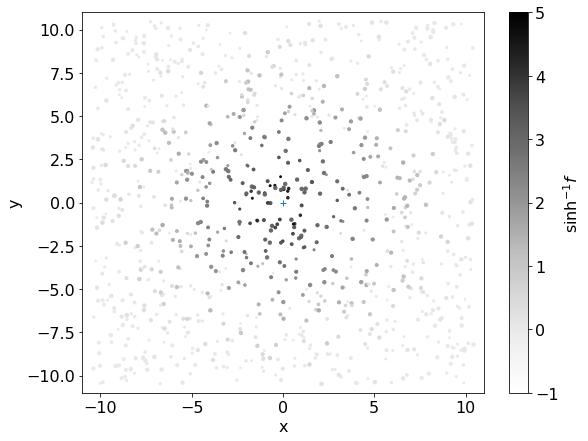

In [12]:
sampling.set_flux(total_flux=1000., noise=1.e-3)
sampling.imshow()
plt.savefig('../tex/figures/tmp/scattered-data.png', dpi=300)

We will reconstruct on a 21 by 21 grid, with the $x$ and $y$ coordinates set below (with coordinate $(0,0)$ at pixel center $(10, 10)$), and pixels space each unit of distance in the space.

The other notebooks in this folder approach the problem of reconstructing an underlying image on this grid, given the sampled data.